### Phase Two Project
**Student Name:** Paul Mbuitu Muriithi

**Course:** DSF-FT05

### King County House Sales With Multiple Linear Regression

#### **Overview**
The real estate market is a complex ecosystem influenced by numerous factors, making it crucial to understand the dynamics that drive house prices. In this project, the aim is to delve into the realm of house sales analysis in King County using multiple linear regression modeling. By leveraging the power of data analysis and machine learning techniques, the relationships between various attributes and the sale prices of houses in the region will be explored so that they can be used to make profitable decisions by a housing development company.

#### **Business Problem**
The stakeholders are searching for the qualities that lead to higher home sale prices. The aim is to develop an accurate and reliable multiple linear regression model by leveraging the King County House Sales dataset, a model that can predict house prices based on various independent variables.

#### **Main Objective**
To develop an accurate and reliable multiple linear regression model that can predict house prices based on various independent variables.

#### **Specific Objectives**
* To find out which attributes have a significant impact on house prices in ing County.
* To find out the relationship between the independent variables and the sales prices of houses.
* To find out how accurately house prices can be predicted using the available attributes.

#### **Hypotheses**
* **Null hypothesis(Ho):** There is no relationship between our features and our target variable, price.
* **Alternative hypothesis(Ha):** There is a relationship between our features and our target variable, price.

A significance level (alpha) of 0.05 will be used to decide if to reject or fail to reject the null hypothesis.

If the p-value is lower than the significance level, it is considered statistically significant, 
and we reject the null hypothesis.

#### **Experimental Design**

* Data Collection
* Read and check the data
* Cleaning the data
* Exploratory Data Analysis
* Modelling
* Recommendations, Conclusions, and Next Steps

#### **Data Understanding**
* King County House Data will be used. The file contains data for 21,597 homes built in King County from 1900 to 2015. Each home in the set contains information regarding features such as the number of bedrooms/bathrooms, number of floors, square footage, zipcode, condition of the house, the year when the house was built, and more.

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline


In [2]:
# reading the King County House Data
df = pd.read_csv("kc_house_data.csv")

# previewing the DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# getting info for the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* The data types in the dataset are integers, objects and floats.
* There are missing values in waterfont, view and yr_renovated.


In [4]:
# checking for duplicates
df.id.duplicated().sum()

177

In [5]:
# showing duplicates
df.loc[df["id"].duplicated()==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [6]:
# reviewing duplicates
df.loc[df["id"]== 8820903380]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242


In [7]:
# reviewing duplicates
df.loc[df["id"]== 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


In [8]:
# reviewing duplicates
df.loc[df["id"]== 7853400250]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20164,7853400250,6/4/2014,610000.0,4,3.5,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20165,7853400250,2/19/2015,645000.0,4,3.5,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


In [9]:
# reviewing duplicates
df.loc[df["id"]== 2724049222]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20596,2724049222,8/2/2014,163800.0,2,2.5,1000,1092,2.0,NaN,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20597,2724049222,12/1/2014,220000.0,2,2.5,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466


The duplicates shows that the same house has been sold multiple times over a period. To approach this, rows with duplicates will be dropped and keep the latest the house was sold.

In [10]:
# dropping duplicates
df.drop_duplicates(subset="id", keep="last", inplace=True)

**Handling Missing values**

In [11]:
# calculating the number of missing values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Rows with missing values will be dropped as they are categorical and it would be good not to fill them with biased information.

In [12]:
# dropping rows missing values from our dataset
df.dropna(axis='index', inplace=True)

In [13]:
# confirming the dropped rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15636 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15636 non-null  int64  
 1   date           15636 non-null  object 
 2   price          15636 non-null  float64
 3   bedrooms       15636 non-null  int64  
 4   bathrooms      15636 non-null  float64
 5   sqft_living    15636 non-null  int64  
 6   sqft_lot       15636 non-null  int64  
 7   floors         15636 non-null  float64
 8   waterfront     15636 non-null  object 
 9   view           15636 non-null  object 
 10  condition      15636 non-null  object 
 11  grade          15636 non-null  object 
 12  sqft_above     15636 non-null  int64  
 13  sqft_basement  15636 non-null  object 
 14  yr_built       15636 non-null  int64  
 15  yr_renovated   15636 non-null  float64
 16  zipcode        15636 non-null  int64  
 17  lat            15636 non-null  float64
 18  long  

#### **Exploratory Data Analysis**


* The houses price in the dataset ranges from 82,000 dollars to 7,700,000 dollares.
* The mean house price is 541,642 dollars, while the median house price is 450,000 dollars.

In [14]:
# checking the dispersion of years built
df.yr_built.describe()

count    15636.000000
mean      1971.195574
std         29.355196
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [15]:
# getting counts for each value in condition column
df.condition.value_counts()

Average      10138
Good          4112
Very Good     1244
Fair           124
Poor            18
Name: condition, dtype: int64

In [16]:
# converting condition rating values into discrete variables
# dictionary to replace the values
to_replace = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}
# replacing values in the condition colum using the mapping
df["condition"] = df["condition"].map(to_replace)

# obtaining value counts of each category in the condition column
value_counts = df['condition'].value_counts()

print(value_counts)


3    10138
4     4112
5     1244
2      124
1       18
Name: condition, dtype: int64


In [17]:
# getting counts for each value in waterfrontcolumn
df.waterfront.value_counts()

NO     15516
YES      120
Name: waterfront, dtype: int64

In [18]:
# getting counts for each value in grade column
df.grade.value_counts()

7 Average        6480
8 Good           4419
9 Better         1912
6 Low Average    1454
10 Very Good      830
11 Excellent      287
5 Fair            161
12 Luxury          65
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64

In [19]:
# removing names and retaining numbers only
df['grade'] = df['grade'].map(lambda x: x.split(' ')[0]).astype(int)

* Grade is a categorical variable related to the construction and design of the house.
* The most common building grade is a 7, which is defined as, "Average grade of construction and design."

In [20]:
# getting descriptive statistics for square footage of living space in the home
df.sqft_living.describe()

count    15636.000000
mean      2086.886288
std        919.077862
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2557.750000
max      13540.000000
Name: sqft_living, dtype: float64

The mean square-feet of living space is 2,086 square feet, but there are houses as small as 370 sqft and as large as 13,540 sqft in this dataset.

* There are columns in the dataset that may not be useful in the evaluation, hence it's good to drop them.

In [21]:
# dropping unwanted columns
drop_columns = ["id", "date", "view", "sqft_above", "sqft_basement", 
                "yr_renovated","lat", "long", "sqft_living15", "sqft_lot15"]
df = df.drop(columns=drop_columns).reset_index(drop=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,538000.0,3,2.25,2570,7242,2.0,NO,3,7,1951,98125
1,604000.0,4,3.00,1960,5000,1.0,NO,5,7,1965,98136
2,510000.0,3,2.00,1680,8080,1.0,NO,3,8,1987,98074
3,1230000.0,4,4.50,5420,101930,1.0,NO,3,11,2001,98053
4,257500.0,3,2.25,1715,6819,2.0,NO,3,7,1995,98003


* Checking for outliers in our price for houses.

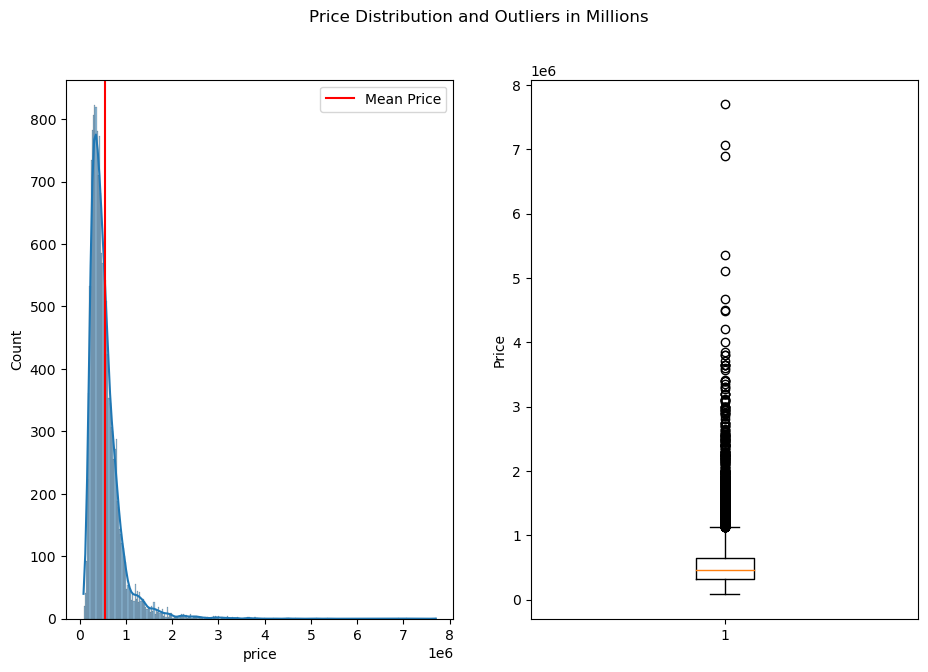

In [22]:
# creating a figure and axis
fig, ax = plt.subplots(figsize= (11, 7), ncols= 2)
# plotting a histogram with KDE and a vertical line indicating the mean price
sns.histplot(df.price, kde=True, ax=ax[0])
ax[0].axvline(df.price.mean(), color= "red", label="Mean Price")

# plotting a boxplot
ax[1].boxplot(df.price)
ax[1].set_ylabel("Price")

ax[0].legend()
fig.suptitle("Price Distribution and Outliers in Millions")
plt.show()



From the above visualizations, it's evident that a majority of price distrubutions ranges to around 1.2 million. Absolute outlires will be considered as any price above 5 million and they will be dropped.

In [23]:
# dropping the outliers
# filter dateframe for rows with price less than 5,000,000
df = df.loc[df["price"] < 5_000_000]
df.shape

(15631, 11)

In [24]:
df.price.describe()

count    1.563100e+04
mean     5.408538e+05
std      3.569532e+05
min      8.250000e+04
25%      3.240000e+05
50%      4.520000e+05
75%      6.450000e+05
max      4.670000e+06
Name: price, dtype: float64

* The houses price in the dataset ranges from 82,500 dollars to 4,670,000 dollares.
* The mean house price is 540,854 dollars, while the median house price is 452,000 dollars.

#### **Modelling**

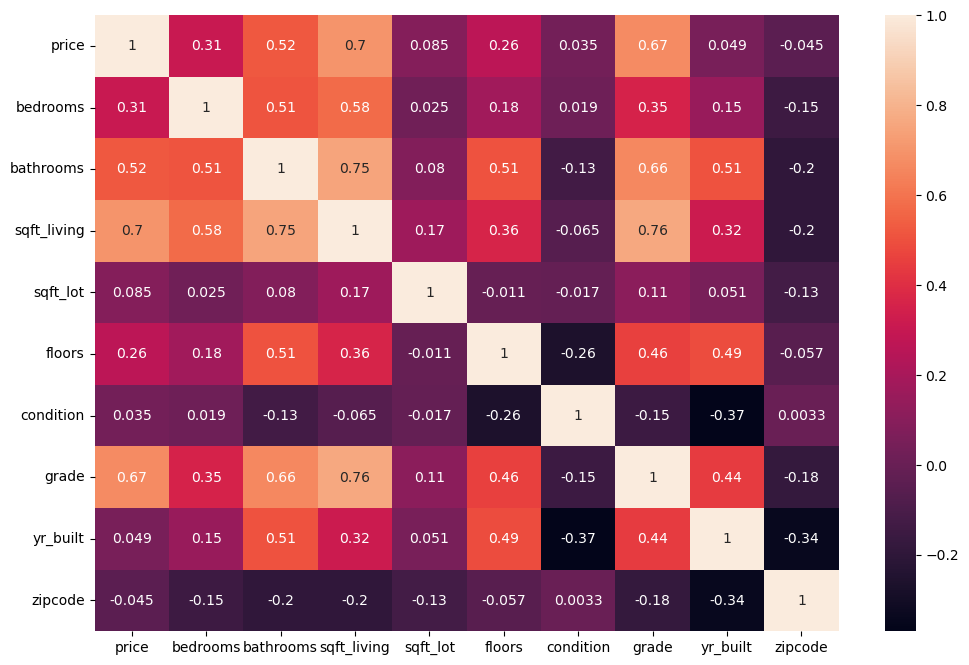

In [25]:
# generate heatmap to display correlations
# creating the `corr` DataFrame, figure and axis objects
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True);

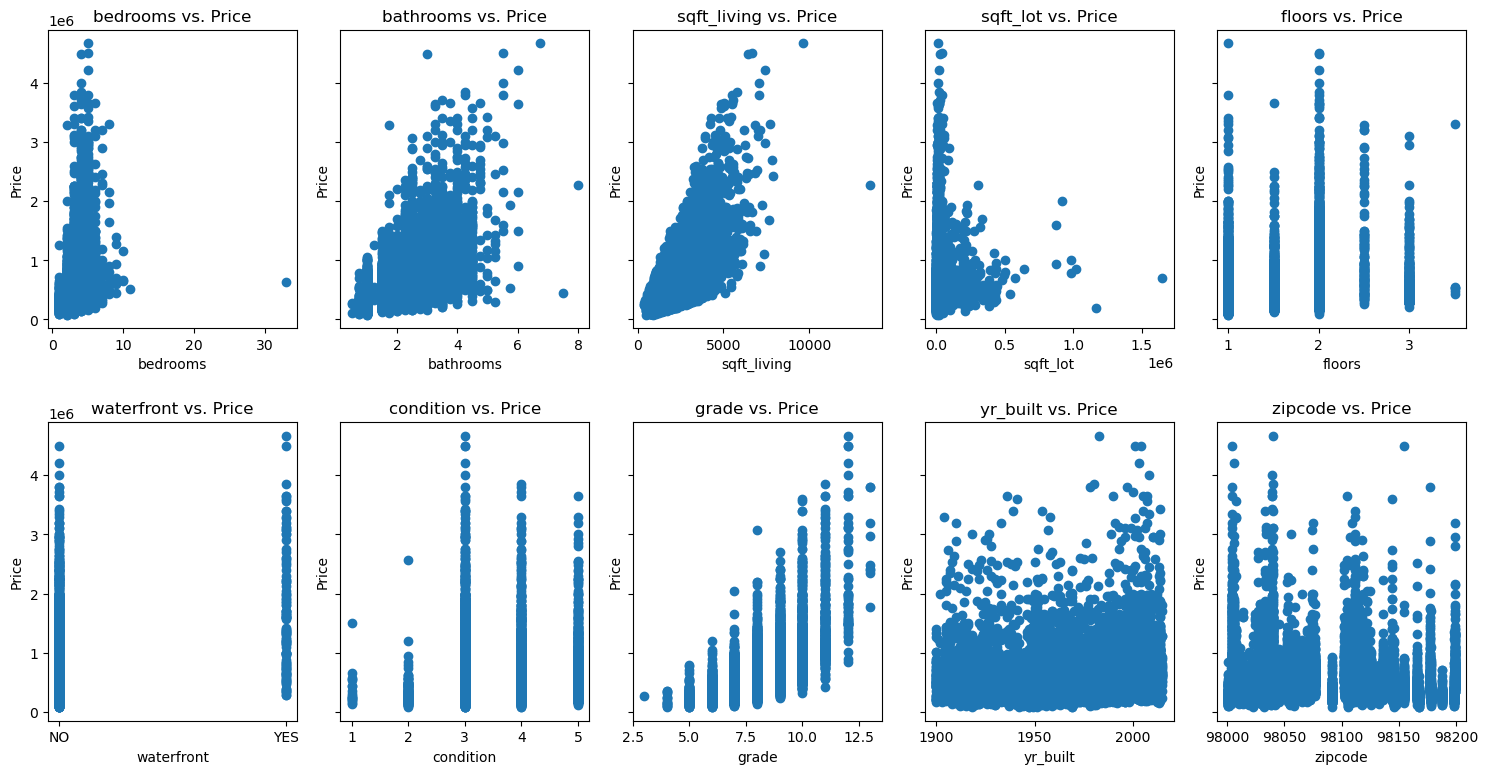

In [26]:
# visualizations to see the relationship between 
# price(dependentvariable) and predictors(independent variables)

fig = plt.figure(figsize=(15, 8))
axes = fig.subplots(nrows=2, ncols=5, sharey=True)

# Specify the variables for x-axis
x_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
               'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode'
        ]

# Iterate over the axes and plot the scatter plots
for i, variable in enumerate(x_variables):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index
    
    # Plot scatter plot for each variable
    axes[row, col].scatter(df[variable], df['price'])
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'{variable} vs. Price')

# Rotate x-axis labels for 'grade' variable
    #if variable == 'grade':  
        #axes[row, col].set_xticklabels(axes[row, col].get_xticks(), rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


**Fitting baseline model**

* Find which features are most correlated with price excluding the categorical variables.

In [27]:
# Exclude 'grade', 'waterfront', 'condition', and 'zipcode'
excluded_features = ['grade', 'waterfront', 'condition', 'zipcode']
correlation_without_excluded = df.drop(columns=excluded_features)

# Calculate correlation with 'price'
correlation_with_price = correlation_without_excluded.corr()['price']

# Sort correlations in descending order
sorted_correlation = correlation_with_price.sort_values(ascending=False)

print(sorted_correlation)






price          1.000000
sqft_living    0.699621
bathrooms      0.522471
bedrooms       0.308286
floors         0.263004
sqft_lot       0.084767
yr_built       0.049014
Name: price, dtype: float64


Since sqft_living is the feature with the strongest correlation, build a simple linear regression with that.

In [28]:
Y = df["price"]
X_baseline = df["sqft_living"]

In [29]:
baseline_model = sm.OLS(Y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.498e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:36:31   Log-Likelihood:            -2.1677e+05
No. Observations:               15631   AIC:                         4.335e+05
Df Residuals:                   15629   BIC:                         4.336e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.185e+04   5104.013     -6.241      

* The model is statistically significant overall, with an F-statistic p-value well below 0.05.
* The model explains about 49% of the variance in price.
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05.
* If square footage of living space in the home is 0, we would expect price to be about -31,850 dollars.
* For each increase of 1 square footage of living space in the home, we see an associated increase in price of about 275 dollars.

**Fitting multiple regression**

In [30]:
# create a copy of the DataFrame df and drops the column price
X_multiple = df.copy().drop(["price", "zipcode", "grade"], axis=1)

# uses pd.get_dummies() from the pandas library to perform one-hot encoding on categorical variables.
X_multiple = pd.get_dummies(X_multiple, columns=["condition", "waterfront"])
X_multiple = X_multiple.drop(["waterfront_NO", "condition_3"], axis=1)
X_multiple


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_1,condition_2,condition_4,condition_5,waterfront_YES
0,3,2.25,2570,7242,2.0,1951,0,0,0,0,0
1,4,3.00,1960,5000,1.0,1965,0,0,0,1,0
2,3,2.00,1680,8080,1.0,1987,0,0,0,0,0
3,4,4.50,5420,101930,1.0,2001,0,0,0,0,0
4,3,2.25,1715,6819,2.0,1995,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15631,3,2.50,1310,1294,2.0,2008,0,0,0,0,0
15632,3,2.50,1530,1131,3.0,2009,0,0,0,0,0
15633,4,2.50,2310,5813,2.0,2014,0,0,0,0,0
15634,2,0.75,1020,1350,2.0,2009,0,0,0,0,0


 Checking for collinearity issues if all of these features are included in one regression model.

In [31]:
X_multiple.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_1,condition_2,condition_4,condition_5,waterfront_YES
bedrooms,1.000000,0.512366,0.575437,0.025430,0.179738,0.153155,-0.025893,-0.052495,-0.012801,0.021623,-0.008488
bathrooms,0.512366,1.000000,0.751445,0.079630,0.505167,0.506270,-0.038179,-0.076893,-0.170277,-0.040108,0.061406
sqft_living,0.575437,0.751445,1.000000,0.165271,0.359630,0.316616,-0.027438,-0.061335,-0.084627,-0.022973,0.102814
sqft_lot,0.025430,0.079630,0.165271,1.000000,-0.010678,0.051168,0.011035,0.051955,0.012254,-0.020046,0.025252
floors,0.179738,0.505167,0.359630,-0.010678,1.000000,0.486797,-0.020780,-0.052944,-0.259926,-0.117894,0.016945
yr_built,0.153155,0.506270,0.316616,0.051168,0.486797,1.000000,-0.047400,-0.066272,-0.260380,-0.250596,-0.024529
condition_1,-0.025893,-0.038179,-0.027438,0.011035,-0.020780,-0.047400,1.000000,-0.003036,-0.020283,-0.009984,0.018832
condition_2,-0.052495,-0.076893,-0.061335,0.051955,-0.052944,-0.066272,-0.003036,1.000000,-0.053419,-0.026295,0.000532
condition_4,-0.012801,-0.170277,-0.084627,0.012254,-0.259926,-0.260380,-0.020283,-0.053419,1.000000,-0.175660,0.013373
condition_5,0.021623,-0.040108,-0.022973,-0.020046,-0.117894,-0.250596,-0.009984,-0.026295,-0.175660,1.000000,0.012586


Based on the correlation matrix above, there are some moderate-to-high correlations between certain predictor variables in the dataset. For example:
* Bedrooms and bathrooms have a correlation coefficient of 0.512, indicating a moderate positive correlation.
* Bathrooms and sqft_living have a correlation coefficient of 0.751, indicating a relatively high positive correlation.

These correlations suggest the presence of collinearity among these variables. 

To address collinearity issues, one variable from highly correlated pairs will be removed.

In [32]:
# Drop bedrooms, bathrooms and grade from the DataFrame
X_multiple.drop(["bathrooms"], axis=1, inplace=True)

# fittng the model
multiple_model = sm.OLS(Y, sm.add_constant(X_multiple))
multiple_results = multiple_model.fit()
print(multiple_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2155.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:36:32   Log-Likelihood:            -2.1525e+05
No. Observations:               15631   AIC:                         4.305e+05
Df Residuals:                   15620   BIC:                         4.306e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.217e+06   1.51e+05     34.

* The model overall is statistically significant at standard alpha of 0.05 being 0.0, and it explains 58% percent of the variance in sale price.
* The model coefficients are statistically significant except condition_1, condition_2 and condition_4. What this means is that there's no significant difference between this conditions and condition_3 which is our reference condition.
* In comparison to the baseline model, the multiple model is an improvement with explained variance in price from 49% to 58%
* The constant here explains that all factors held constant, a house with no waterfront and an average condition of the house is related to maintenance of house(condition_3), we would have a sale price of 5,217,000 dollars.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


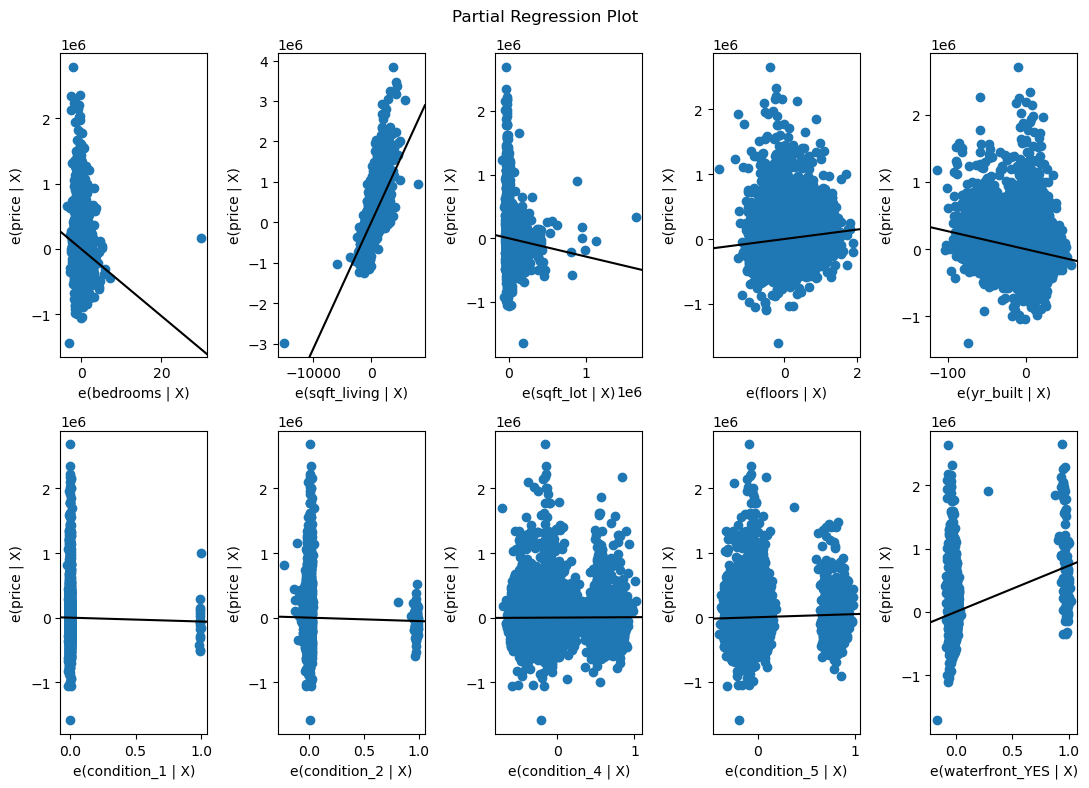

In [33]:
fig = plt.figure(figsize=(11, 8))
sm.graphics.plot_partregress_grid(
    multiple_results, 
    exog_idx=list(X_multiple.columns.values), 
    grid=(2, 5), fig=fig)

plt.tight_layout()
plt.show()

**Transformations**

* Considering our predictor scatterplots above, we would need to transform them to follow the assumption of linearity in L.I.N.E

In [34]:
# columns to transform
log_cols = ["sqft_living", "sqft_lot"]

# unselected columns
unlog_cols = ["bedrooms", "floors", "yr_built", "waterfront_YES", "condition_1", "condition_2","condition_4", "condition_5"]
X_log = X_multiple[log_cols]
for col in X_log.columns:
    X_log[col] = X_log[col] - np.log(X_log[col])

X_log = pd.concat([X_log, X_multiple[unlog_cols]], axis=1)

X_log

,sqft_living,sqft_lot,bedrooms,floors,yr_built,waterfront_YES,condition_1,condition_2,condition_4,condition_5
0,2562.148339,7233.112347,3,2.0,1951,0,0,0,0,0
1,1952.419300,4991.482807,4,1.0,1965,0,0,0,0,1
2,1672.573451,8071.002853,3,1.0,1987,0,0,0,0,0
3,5411.402149,101918.467958,4,1.0,2001,0,0,0,0,0
4,1707.552832,6810.172532,3,2.0,1995,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15631,1302.822218,1286.834507,3,2.0,2008,0,0,0,0,0
15632,1522.666977,1123.969143,3,3.0,2009,0,0,0,0,0
15633,2302.254997,5804.332148,4,2.0,2014,0,0,0,0,0
15634,1013.072442,1342.792140,2,2.0,2009,0,0,0,0,0


In [35]:
# fitting log model
log_model = sm.OLS(Y, sm.add_constant(X_log))
log_results = log_model.fit()
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2156.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:36:38   Log-Likelihood:            -2.1525e+05
No. Observations:               15631   AIC:                         4.305e+05
Df Residuals:                   15620   BIC:                         4.306e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.218e+06   1.51e+05     34.

* While this iteration did not increased R2 score still hoped to achieve a higher one.
* To attempt to increase R2 score, 'grade' and 'zipcode' will be included as features. These are categorical variables found in the kc_housing dataset.



In [36]:
# adding grade and zipcode columns
# create a copy of the DataFrame df and drops the column price
X_multiple2 = df.copy().drop(["price", "bathrooms"], axis=1)

# uses pd.get_dummies() from the pandas library to perform one-hot encoding on categorical variables.
X_multiple2 = pd.get_dummies(X_multiple2, columns=["condition", "waterfront", "grade", "zipcode"])
X_multiple2 = X_multiple2.drop(["condition_3", "waterfront_NO", "grade_3", "zipcode_98001"], axis=1)
X_multiple2


,bedrooms,sqft_living,sqft_lot,floors,yr_built,condition_1,condition_2,condition_4,condition_5,waterfront_YES,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,2570,7242,2.0,1951,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1960,5000,1.0,1965,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1680,8080,1.0,1987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,5420,101930,1.0,2001,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1715,6819,2.0,1995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15631,3,1310,1294,2.0,2008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15632,3,1530,1131,3.0,2009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15633,4,2310,5813,2.0,2014,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15634,2,1020,1350,2.0,2009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# fitting the model
# fittng the model
multiple_model2 = sm.OLS(Y, sm.add_constant(X_multiple2))
multiple_results2 = multiple_model2.fit()
print(multiple_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     825.7
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:36:41   Log-Likelihood:            -2.0839e+05
No. Observations:               15631   AIC:                         4.170e+05
Df Residuals:                   15541   BIC:                         4.176e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.084e+06   1.95e+05      5.

* The model overall is statistically significant at standard alpha of 0.05 being 0.0, and it explains about 83% percent of the variance in sale price.
* The constant here explains that all factors held constant, a house with no waterfront, an average condition of the house is related to maintenance of house(condition_3), overall grade of the house related to the construction and design of the house being 3,(poor) and at zipcode_98001, we would have a sale price of 1,084,000 dollars.

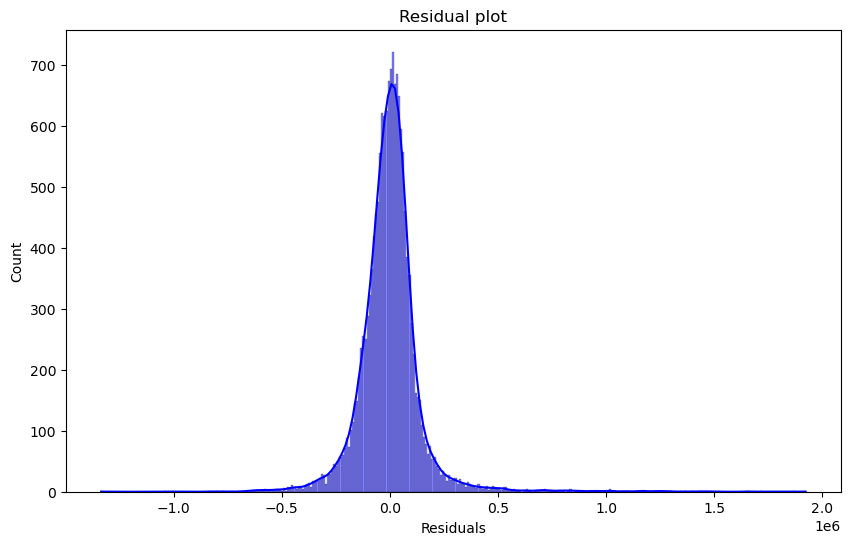

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(bins="auto", x=multiple_results2.resid, kde=True, color="blue")
plt.xlabel("Residuals")
plt.title("Residual plot")
plt.show()

In [39]:
# MAE
y_pred = multiple_results.predict(sm.add_constant(X_multiple))
print(mean_absolute_error(Y, y_pred))
y_pred2 = multiple_results2.predict(sm.add_constant(X_multiple2))
print(mean_absolute_error(Y, y_pred2))

155599.72000009075
91226.83575062237


* Using mean abosulute error over root mean squared error because of the propensity for RMSE to inflate values due to the square feature.
* The final model has reduced our mean absolute error by about 64,000 dollars

In [40]:
multiple_results2_df = pd.concat([multiple_results2.params, multiple_results2.pvalues], axis=1)
multiple_results2_df.columns = ["coefficient", "pvalue"]
multiple_results2_df

,coefficient,pvalue
const,1.083768e+06,2.968840e-08
bedrooms,-1.041595e+04,4.064906e-10
sqft_living,1.638884e+02,0.000000e+00
sqft_lot,2.180538e-01,5.519377e-12
floors,-5.930566e+03,4.865995e-02
...,...,...
zipcode_98177,2.522487e+05,2.738927e-66
zipcode_98178,3.593425e+04,1.384201e-02
zipcode_98188,2.412819e+04,1.793163e-01
zipcode_98198,1.809617e+04,2.030983e-01


In [41]:
# Checking those that are not statistically significant 
multiple_results2_df[multiple_results2_df["pvalue"] > 0.05]

,coefficient,pvalue
condition_2,-21567.873550,0.116095
grade_4,-71041.225560,0.646147
grade_5,-114899.194485,0.445318
grade_6,-116247.530860,0.438763
grade_7,-103526.325181,0.490486
grade_8,-62391.662785,0.677832
grade_9,34748.944852,0.817120
grade_10,180093.466713,0.231095
zipcode_98002,8070.492917,0.602754
zipcode_98003,-6439.763411,0.643476


* Our reference categories are condition_3 for condition, grade_3 for grade, and zipcode_98001 for zipcode, hence the above pvalues means that there is no significant differences when compared to their respective reference category.

**Results**


* The multiple linear regression model built has an R-squared value of 0.825, which indicates that the model can explain 83% of the variance of the markethouse sale prices which is a good sign that the model is effective in predicting the prices.
* For an average house and its overall grade related to the construction and design of the house being poor, no waterfront and being at zipcode_98001, we would have a sale price of 1,084,000 dollars.
* The model is off by about 91,226 dollars.
* All of available features impactful for inferring and predicting house sale prices and can be considered by home developers in order to increase selling price.


**Recommendations**
* Increase square-footage of living space.
* Attain the highest possible building condition.
* Attain the highest possible building grade.

By following the above recommendations, a housing development company in King County can increase their chances of selling higher-priced homes.


**Conclusion**

* The prob(F-statistic) of 0.00 tells us that there is an extremely low probability of achieving these results with the null hypothesis being true, and tells us that our regression is meaningful. Our p-values for our features are well below our alpha or significance level, showing that they are each contributing to the model significantly. With an alpha of 0.05, at a confidence level of 95%, we reject the null hypothesis that there is no relationship between our features and our target variable, price.
* There are some limitations to the model. To meet regression assumptions, we had to try out log-transformation on certain variables. Therefore,any new data used with the model would require similar preprocessing. Additionally, since housing prices vary regionally, the model's usefulness for datafrom other counties may be restricted.

**Next Steps**

* In the future, reducing noise in the data to improve the accuracy of our model is needed. 
* Additionally, it is good to investigate certain features, such as proximity to a top school and coffee shop to see what trends could be discerned from that.
